In [24]:
import os
import sys
main_folder = os.path.abspath(os.path.join(os.getcwd(), '..')) #Folder that contains MFPy
sys.path.append(main_folder)
import MFPy
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from cycler import cycler
from matplotlib.lines import Line2D

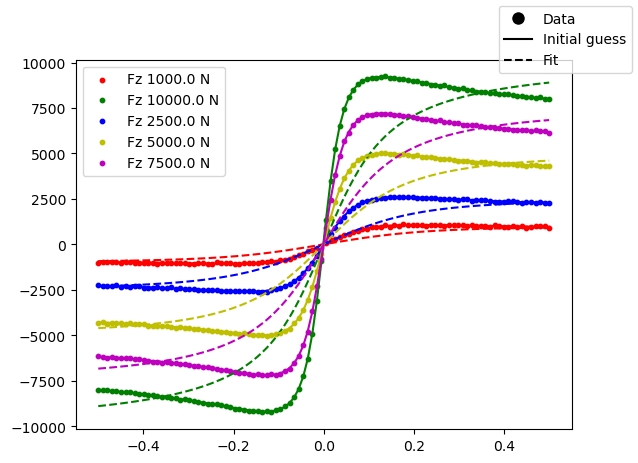

In [33]:
Fx_pure_folder = os.path.join(main_folder,r'sample\fit\Fx_pure')
p_fit,initial_guess,Fz_nom,Fz_data,Fx_data,kappa_data,Fx_initial,Fx_fit = MFPy.Fit.Fx_pure(Fx_pure_folder,Fz_nom=None,full_output=2)

colors = ['r', 'g', 'b', 'y', 'm', 'c']
color_cycle = cycler(color=colors)
ponto_preto = Line2D([0], [0], marker='o', color='w', markerfacecolor='k', markersize=10, label='Data')
# Linha contínua
linha_continua = Line2D([0], [1], color='black', label='Initial guess')
# Linha tracejada
linha_tracejada = Line2D([0], [1], color='black', linestyle='--', label='Fit')
plt.rc('axes', prop_cycle=color_cycle)
fig, ax = plt.subplots()
for i in range(len(Fz_data)):
    color = colors[i % len(colors)] 
    ax.plot(kappa_data[i],Fx_initial[i],'--',color=color)
    ax.scatter(kappa_data[i],Fx_data[i],s=10,color=color,label='Fz {} N'.format(Fz_data[i]))
    ax.plot(kappa_data[i],Fx_fit[i],'-',color=color)
ax.legend()
fig.legend(handles=[ponto_preto, linha_continua, linha_tracejada], loc='upper right')

In [2]:
#Fitting Fx pure

"""The folder is only for the Fx_pure
    The files must be named as the examples in the sample/fit/Fx_pure folder
    FzXXXX.csv (sep = ';' with a column Fx and LSR)
    XXXX means the vertical force used in that test in N
    """
Fx_pure_folder = os.path.join(main_folder,r'sample\fit\Fx_pure')
p_fit_Fx0,p_init,Fz_nom = MFPy.Fit.Fx_pure(Fx_pure_folder,Fz_nom=None,full_output=2)

#Plotting to compare data,initial guess and p_fit
#Choosing Fz = 1000 and Fz = 5000
data_Fz_1000,data_Fz_5000,data_Fz_10000 = pd.read_csv(os.path.join(Fx_pure_folder,'Fz1000.csv')),pd.read_csv(os.path.join(Fx_pure_folder,'Fz5000.csv')),pd.read_csv(os.path.join(Fx_pure_folder,'Fz10000.csv'))

n_points = 100
kappa = np.linspace(-0.5,0.5,n_points)
Fz = np.ones(n_points)
Fx_0_1000_init,Fx_0_5000_init = MFPy.Pacejka.Fx_pure((kappa,Fz*1000),*p_init,Fz_nom)[0],MFPy.Pacejka.Fx_pure((kappa,Fz*5000),*p_init,Fz_nom)[0]
Fx_0_1000_fit,Fx_0_5000_fit = MFPy.Pacejka.Fx_pure((kappa,Fz*1000),*p_fit_Fx0,Fz_nom)[0],MFPy.Pacejka.Fx_pure((kappa,Fz*5000),*p_fit_Fx0,Fz_nom)[0]



#Plotting
plt.scatter(data_Fz_1000['LSR'],data_Fz_1000['Fx'],s=10,c='red')
plt.plot(kappa,Fx_0_1000_init,'-',color='red')
plt.plot(kappa,Fx_0_1000_fit,'--',color='red')

plt.scatter(data_Fz_5000['LSR'],data_Fz_5000['Fx'],s=10,c='blue')
plt.plot(kappa,Fx_0_5000_init,'-',color='blue')
plt.plot(kappa,Fx_0_5000_fit,'--',color='blue')

plt.legend(['Data','Initial Guess','Fit'])

print(p_fit_Fx0)

ValueError: too many values to unpack (expected 3)

In [3]:
#Fitting Fy pure

"""The folder is only for the Fy_pure
    The folder must contains .csv files with columns SA and Fy. Each file shoud have the follow name structure:
        FzXXXX_gammaYYYY.csv
        Where XXXX is the value for the vertical force used in this test
        YYYY is the value in rad for the inclination angle
        The user can follow the examples in the sample/fit
"""
Fy_pure_folder = os.path.join(main_folder,r'sample\fit\Fy_pure')
p_fit_Fy0,p_init,Fz_nom = MFPy.Fit.Fy_pure(Fy_pure_folder,Fz_nom=None,full_output=1)

print(p_fit_Fy0)

[ 1.50040319e+00  9.00249991e-01 -6.04274730e-02 -9.11883871e-03
 -8.10648606e-01 -5.95707165e-01  1.00727374e-01 -6.95877696e+00
 -6.47106438e-02 -1.49668392e+01  1.69247357e+00  3.75063988e-01
  1.98768572e+00 -3.68181543e-01 -8.96378765e-01 -2.07759018e-01
 -2.01192545e-03  3.09361666e-03 -5.83692243e-03  3.99481207e-02
 -2.01441466e-01 -4.98454387e-01]


In [4]:
#Fitting Mz pure

"""The folder is only for the Fy_pure
    The folder must contains .csv files with columns SA and Mz. Each file shoud have the follow name structure:
        FzXXXX_gammaYYYY.csv
        Where XXXX is the value for the vertical force used in this test
        YYYY is the value in rad for the inclination angle
        The user can follow the examples in the sample/fit
"""
Mz_pure_folder = os.path.join(main_folder,r'sample\fit\Mz_pure')
R0 = 0.3015
p_fit_Mz0,p_init,Fz_nom = MFPy.Fit.Mz_pure(Mz_pure_folder,R0,p_fit_Fy0,Fz_nom=None,full_output=1)
print(p_fit_Mz0)

[ 1.19824083e+01 -1.33069672e+00  3.21898418e-02  2.10390447e-01
 -1.52799710e-01 -1.00000000e-01  1.93641811e-03  1.30233448e+00
  9.31924163e-02 -5.53366348e-03  4.00745383e-01 -1.51392148e-02
  2.09688954e-03 -2.04738062e-03 -1.56327775e-01  9.13266247e-03
  1.93864848e-04 -2.45261801e-04 -1.77458199e+00  8.27506219e-01
  3.76821710e-02  3.03431400e-01 -7.37338279e-01  1.49730121e-03
  2.41661485e-03  2.50216969e-01 -1.99992665e-01]
